In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading and Analyzing the datasets

In [3]:
Books = pd.read_csv('Books.csv', error_bad_lines = True)

C:\Anacoda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
Ratings = pd.read_csv('Ratings.csv', error_bad_lines = True)

In [5]:
Users = pd.read_csv('BX-Users.csv',sep=';', error_bad_lines = True)

In [6]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


C:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

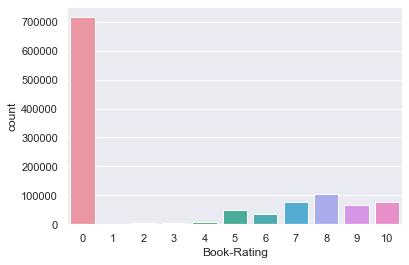

In [9]:
sns.set_theme(style='darkgrid')
sns.countplot('Book-Rating', data = Ratings)

In [10]:
Ratings[Ratings['Book-Rating']>=5]

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [11]:
Ratings.shape

(1149780, 3)

In [12]:
Ratings = Ratings[Ratings['Book-Rating']>=5]

In [13]:
Ratings.shape

(414242, 3)

In [14]:
Ratings.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7


In [15]:
Ratings.groupby('ISBN')['User-ID'].value_counts()

ISBN            User-ID
 0330299891     181817     1
 9022906116     11676      1
#6612432        199864     1
'9607092910'    261539     1
)416195113      124304     1
                          ..
\8888809228\""  275414     1
\9170010242\""  227945     1
ooo7156103      266146     1
´3499128624     86103      1
Ô½crosoft       187517     1
Name: User-ID, Length: 414242, dtype: int64

In [16]:
New_ratings = Ratings['User-ID'].value_counts()

In [17]:
New_ratings.shape

(75117,)

In [18]:
New_ratings[New_ratings>=200].index

Int64Index([ 11676,  98391, 153662, 189835,  23902, 171118, 235105,  76499,
             16795,  56399,
            ...
              2276,  23768, 269566,  38023, 156467, 183995,  60707, 157247,
            101209, 143175],
           dtype='int64', length=138)

In [19]:
Ratings = Ratings[Ratings['User-ID'].isin(New_ratings[New_ratings>=200].index)]
Count = Ratings['User-ID'].value_counts()

In [20]:
Ratings['Book-Rating'].value_counts()

8     15520
10    14230
9     12450
7     10293
5      9579
6      4133
Name: Book-Rating, dtype: int64

In [21]:
Merge_book_Rating_table = pd.merge(Books,Ratings, on='ISBN')

In [22]:
Merge_book_Rating_table.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,197659,9
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,230522,7


In [23]:
Merge_book_Rating_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59499 entries, 0 to 59498
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 59499 non-null  object
 1   Book-Title           59499 non-null  object
 2   Book-Author          59499 non-null  object
 3   Year-Of-Publication  59499 non-null  object
 4   Publisher            59497 non-null  object
 5   Image-URL-S          59499 non-null  object
 6   Image-URL-M          59499 non-null  object
 7   Image-URL-L          59499 non-null  object
 8   User-ID              59499 non-null  int64 
 9   Book-Rating          59499 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 5.0+ MB


In [24]:
Merge_book_Rating_table.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
dtype: int64

In [25]:
columns = ['Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-S']
Merge_book_Rating_table = Merge_book_Rating_table.drop(columns, axis = 1)

In [26]:
Merge_book_Rating_table.head()

,ISBN,Book-Title,Book-Author,Image-URL-L,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...,197659,9
2,0399135782,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,11676,9
3,0399135782,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,46398,9
4,0399135782,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,230522,7


In [27]:
Merge_book_Rating_table.head().shape

(5, 6)

In [28]:
(Merge_book_Rating_table.groupby('Book-Title'))['Book-Rating'].count().reset_index()

,Book-Title,Book-Rating
0,Dark Justice,1
1,Final Fantasy Anthology: Official Strategy Gu...,1
2,Good Wives: Image and Reality in the Lives of...,1
3,Highland Desire (Zebra Splendor Historical Ro...,1
4,Murder of a Sleeping Beauty (Scumble River My...,2
...,...,...
42739,"wet sand, raven tracks",1
42740,whataboutrick.com: a poetic tribute to Richard...,1
42741,"Â¡Corre, perro, corre!",1
42742,Â¿Eres tu mi mamÃ¡?/Are You My Mother?,1


In [29]:
Total_Rating = (Merge_book_Rating_table.
                groupby('Book-Title')
                ['Book-Rating'].count().reset_index().
                rename(columns = {'Book-Rating':'Total_Ratings_count'})
                [['Book-Title','Total_Ratings_count']]
               )

In [30]:

Total_Rating.head()

,Book-Title,Total_Ratings_count
0,Dark Justice,1
1,Final Fantasy Anthology: Official Strategy Gu...,1
2,Good Wives: Image and Reality in the Lives of...,1
3,Highland Desire (Zebra Splendor Historical Ro...,1
4,Murder of a Sleeping Beauty (Scumble River My...,2


In [31]:
Merge_book_Rating_table.head()

,ISBN,Book-Title,Book-Author,Image-URL-L,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...,197659,9
2,0399135782,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,11676,9
3,0399135782,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,46398,9
4,0399135782,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,230522,7


In [32]:
Final_data = Merge_book_Rating_table.merge(Total_Rating,left_on = 'Book-Title', right_on = 'Book-Title', how='left')

In [33]:
Final_data.head()

,ISBN,Book-Title,Book-Author,Image-URL-L,User-ID,Book-Rating,Total_Ratings_count
0,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8,1
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...,197659,9,1
2,0399135782,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,11676,9,13
3,0399135782,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,46398,9,13
4,0399135782,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,230522,7,13


C:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Ratings_count', ylabel='count'>

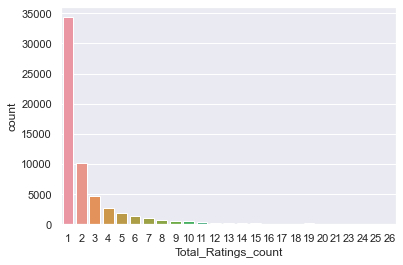

In [34]:
sns.countplot('Total_Ratings_count', data = Final_data)

In [35]:
max(Final_data['Total_Ratings_count'])

26

In [36]:
Final_data.shape

(59499, 7)

In [37]:
Final_data.drop_duplicates(['Book-Title','User-ID'], inplace = True)

In [38]:
Pivot_data = Final_data.pivot(columns='User-ID',index="Book-Title",values='Book-Rating')

In [39]:
Pivot_data

User-ID,2276,3757,4385,6242,6251,6575,7346,11676,13552,16634,...,254899,257204,258185,261829,262998,265115,265889,269566,270713,274061
Book-Title,,,,,,,,,,,,,,,,,,,,,
Dark Justice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final Fantasy Anthology: Official Strategy Guide (Brady Games),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Highland Desire (Zebra Splendor Historical Romances),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"wet sand, raven tracks",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
whataboutrick.com: a poetic tribute to Richard A. Ricci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Â¡Corre, perro, corre!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
Pivot_data.fillna(0,inplace = True)

In [41]:
Pivot_data.head()

User-ID,2276,3757,4385,6242,6251,6575,7346,11676,13552,16634,...,254899,257204,258185,261829,262998,265115,265889,269566,270713,274061
Book-Title,,,,,,,,,,,,,,,,,,,,,
Dark Justice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Highland Desire (Zebra Splendor Historical Romances),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
import scipy as sc
from scipy.sparse import csc_matrix

In [43]:
book_sparse = csc_matrix(Pivot_data)

In [44]:
book_sparse

<42744x138 sparse matrix of type '<class 'numpy.float64'>'
	with 58890 stored elements in Compressed Sparse Column format>

In [45]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm = 'brute')

In [46]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [47]:
distance, suggestions = model.kneighbors(Pivot_data.iloc[20 , :].values.reshape(1,-1),n_neighbors = 10)

In [48]:
distance

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [154]:
suggestions
type(suggestions)
suggestions.shape[1]

10

In [93]:
for i in suggestions:
    print(Pivot_data.index[i])

Index(['The Pistol Poets', 'Gone Tomorrow: A Bill Slider Mystery',
       'Castle Rouge: A Novel of Suspense featuring Sherlock Holmes, Irene Adler, and Jack the Ripper',
       'Blood Relations: A Torie O'Shea Mystery', 'Delusion: A Mystery',
       'A Poultice for a Healer (Chronicles of Issac of Girona)',
       'The Girl with the Long Back: A Harpur &amp; Iles Mystery',
       'The Blood Doctor', 'A Deep Blue Farewell (Scotia MacKinnon Mysteries)',
       'Veiled Threats'],
      dtype='object', name='Book-Title')


In [94]:
Book_List = []
temp_df = Final_data[Final_data['Book-Title'] == 'The Pistol Poets']
temp_df = temp_df.drop_duplicates('Book-Title')
Book_List.extend(list(temp_df['Book-Title'].values))
Book_List.extend(list(temp_df['Book-Author'].values))
Book_List.extend(list(temp_df['Image-URL-L'].values))

for i in suggestions:
    print(i)
    
print(Pivot_data.index[13315])

[35799 13315  5946  4747  8752  1111 33046 30780   528 40430]
Gone Tomorrow: A Bill Slider Mystery


In [116]:
Recommend_data = []
for i in suggestions:
    Book_List = []
    print(i)
    book = Pivot_data.index[3]
    print(bookName)
    print('nnn')

[35799 13315  5946  4747  8752  1111 33046 30780   528 40430]
 Highland Desire (Zebra Splendor Historical Romances)
nnn


In [159]:
def recommend_book(book_name):
    book_id = np.where(Pivot_data.index == book_name)[0][0]
    distance , suggestion = model.kneighbors(Pivot_data.iloc[book_id , :].values.reshape(1,-1) , n_neighbors=8)
#    print(suggestion)
    
    Recommend_data = []
    
    for i in range(suggestion.shape[1]):
        Book_List = []
        bookName = Pivot_data.index[i]
        temp_df = Books[Books['Book-Title'] == Pivot_data.index[i]]
        Book_List.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        Book_List.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        Book_List.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-L'].values))
        Recommend_data.append(Book_List)
        
    return Recommend_data     

In [160]:
book_name = 'My Life on A Plate'
recommend_book(book_name)

[[' Dark Justice',
  'Jack Higgins',
  'http://images.amazon.com/images/P/0399151788.01.LZZZZZZZ.jpg'],
 [' Final Fantasy Anthology: Official Strategy Guide (Brady Games)',
  'David Cassady',
  'http://images.amazon.com/images/P/1566869250.01.LZZZZZZZ.jpg'],
 [' Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750',
  'Laurel Thatcher Ulrich',
  'http://images.amazon.com/images/P/0679732578.01.LZZZZZZZ.jpg'],
 [' Highland Desire (Zebra Splendor Historical Romances)',
  'Joyce Carlow',
  'http://images.amazon.com/images/P/0821760580.01.LZZZZZZZ.jpg'],
 [' Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback))',
  'Denise Swanson',
  'http://images.amazon.com/images/P/0451205480.01.LZZZZZZZ.jpg'],
 [' Nonbook Materials: The Organization of Integrated Collections',
  'Jean Riddle Weihs',
  'http://images.amazon.com/images/P/0888020910.01.LZZZZZZZ.jpg'],
 [' Q-Space (Star Trek The Next Generation, Book 47)',
  'Greg Cox',
  'http://images.amazon

In [162]:
import pickle
pickle.dump(model , open("model.pkl" , 'wb'))
pickle.dump(Final_data , open("Final_data.pkl" , 'wb'))
pickle.dump(Pivot_data , open("Pivot_data.pkl" , 'wb'))